<h1><center> Data Analyses & Visualization of Medical Insurance Cost data</center></h1>

Source: https://github.com/stedy/Machine-Learning-with-R-datasets

Objective: Predict cost depending on features

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and cleaning data

In [2]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


**Understanding data from source**
1. **Age**: insurance contractor age, years
2. **Sex**: insurance contractor gender, [female, male]
3. **BMI**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4. **Children**: number of children covered by health insurance / Number of dependents
5. **Smoker**: smoking, [yes, no]
6. **Region**: the beneficiary’s residential area in the US, [northeast, southeast, southwest, northwest]
7. **Charges**: Individual medical costs billed by health insurance (annually)

In [3]:
# Removing possible missing/nan values in dataframe
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing data or nan/null values so we can continue with the data that we have.

In [4]:
# Check data types to make sure they are correct according to its column labels
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Removing duplicates in dataframe
df.drop_duplicates(inplace=True)

In [6]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.shape

(1337, 7)

Given the relatively small data size, we would extract as much information from the data to understand the model.

In [8]:
# Normalize non-numeric features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
le.fit(df.sex)
gender = list(le.classes_)
gender = pd.DataFrame({'Sex': gender})
df.sex = le.transform(df.sex)
gender

,Sex
0,female
1,male


In [10]:
le.fit(df.smoker)
smoker = list(le.classes_)
smoker = pd.DataFrame({'Smoker': smoker})
df.smoker = le.transform(df.smoker)
smoker

,Smoker
0,no
1,yes


In [11]:
# Understanding that non-binary caterogical variable would work best with OneHotEncode
# however since region doesn't appear in a specific order it doesn't make any difference
le.fit(df.region)
region = list(le.classes_)
region = pd.DataFrame({'Region': region})
df.region = le.transform(df.region)
region

,Region
0,northeast
1,northwest
2,southeast
3,southwest


In [12]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


Non-numeric features now easily represented by indices represented in the arrays shown above. This is necessary to easily find corellation between features shown in the next portion.

### Correlation and distribution between features

In [13]:
df.corr()['charges'].sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

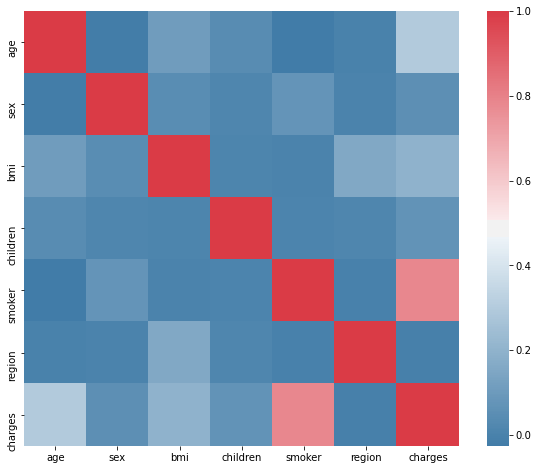

In [14]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True), square=True)
plt.show()

It appears that the strongest correlation between the insurance cost and the features is whether the subject is a smoker or not. The next two most strong correlation is age and BMI.

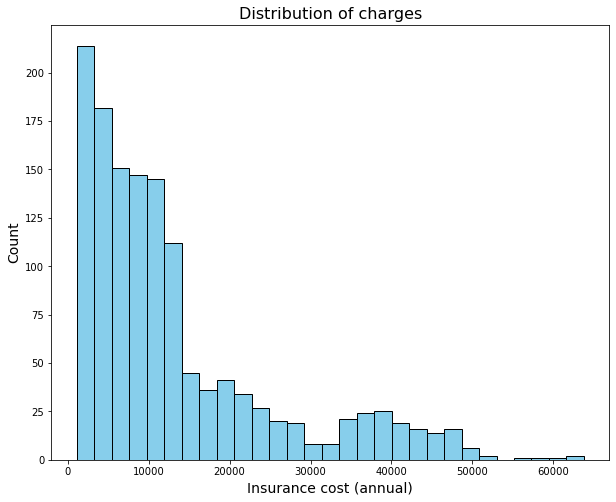

Average insurance cost: $13279.12


In [53]:
# Display distribution of charges to see how much patients pay on average.
plt.figure(figsize=(10,8))
plt.hist(x=df.charges, bins='auto', histtype='bar', ec='black', color='skyblue')
plt.title('Distribution of charges', fontsize=16)
plt.xlabel('Insurance cost (annual)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()
print(f'Average insurance cost: ${round(np.mean(df.charges), 2)}')

#### Smoker
Since seeing if the patient smoke or not has the highest correlation with charges. We can display the distribution of charges for smoker and non-smoker.

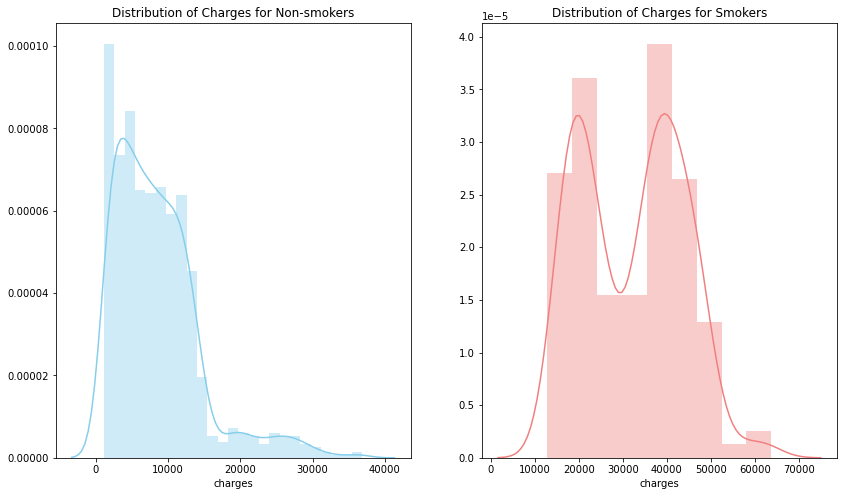

In [50]:
f, axs = plt.subplots(1,2,figsize=(14,8))

sns.distplot(df[(df.smoker == 0)]['charges'],color='skyblue',ax=axs[0])
axs[0].set_title('Distribution of Charges for Non-smokers')

sns.distplot(df[(df.smoker == 1)]['charges'],color='lightcoral',ax=axs[1])
axs[1].set_title('Distribution of Charges for Smokers')

plt.show()

Smoking patients spend more on treatments than non-smoking patients. To solidify this statement more we can display the violin plot of smokers and non-smokers to provide more information such as average, interquartile range and density.

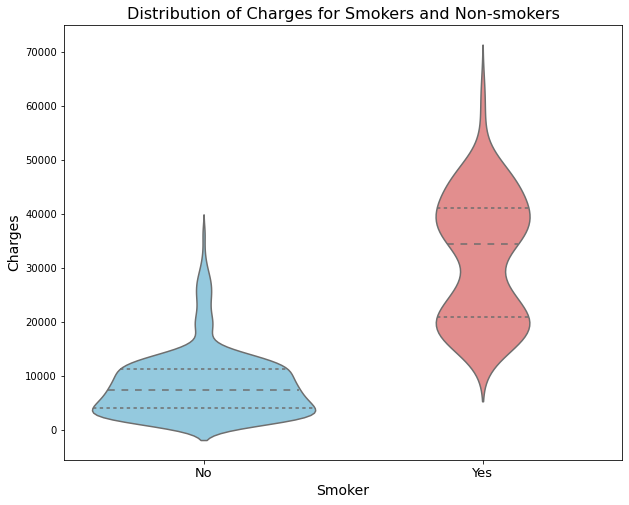

Average cost for non-smoker patients: $8440.66
Average cost for smoker patients: $32050.23


In [106]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x='smoker', y='charges', data=df, figsize=(10,8), palette=['skyblue', 'lightcoral'], inner='quartile')
ax.set_xticklabels(['No', 'Yes'], fontsize=13)
ax.set_xlabel('Smoker', fontsize=14)
ax.set_ylabel('Charges', fontsize=14)
plt.title('Distribution of Charges for Smokers and Non-smokers', fontsize=16)
plt.show()
print(f'Average cost for non-smoker patients: ${round(np.mean(df[(df.smoker == 0)]).charges, 2)}')
print(f'Average cost for smoker patients: ${round(np.mean(df[(df.smoker == 1)]).charges, 2)}')

Through this violin graph, we can see that the average treatment cost for smoker patients are significantly higher than non-smoker patients. In addition, the majority of payment frequency of non-smokers are on the lower end of the graph while most smokers would more likely pay more.

#### Age
Second highest correlated feature is age. We can map out the relationship between age, as well as the previous analyses which is the smoker feature to show how the they affected how much patients pay for treatments.

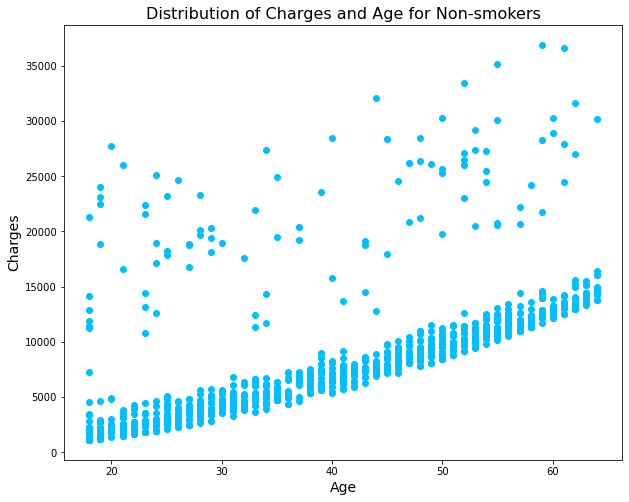

In [52]:
non_smoker = df[(df.smoker == 0)]
plt.figure(figsize=(10,8))
plt.scatter(non_smoker['age'], non_smoker['charges'], color='deepskyblue')
plt.title('Distribution of Charges and Age for Non-smokers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()

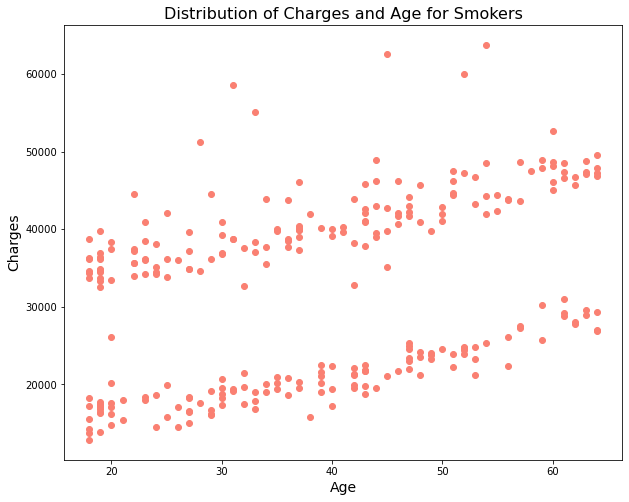

In [51]:
smoker = df[(df.smoker == 1)]
plt.figure(figsize=(10,8))
plt.scatter(smoker['age'], smoker['charges'], color='salmon')
plt.title('Distribution of Charges and Age for Smokers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()

At a glance, within patients of the same age, smokers pay extremely higher for medical cost. We can see it in the combined chart below accompanied with a linear regression line to see how it compares.

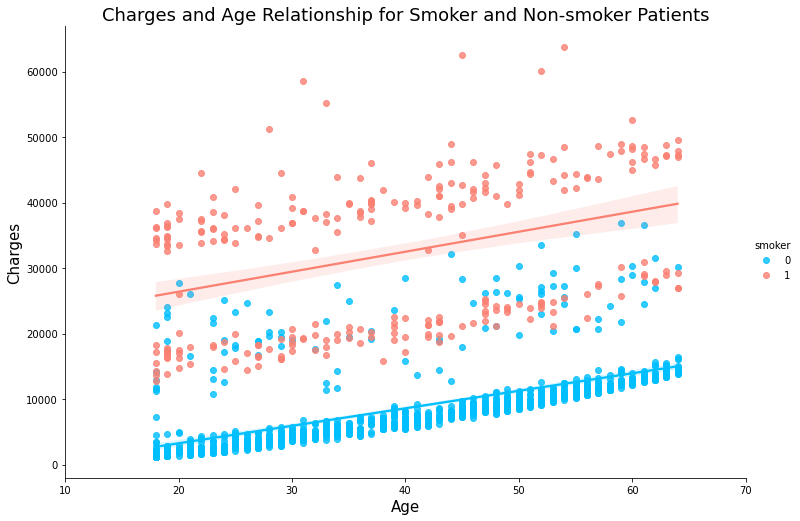

In [21]:
sns.set_palette(sns.color_palette(['deepskyblue', 'salmon']))
sns.lmplot(x='age', y='charges', hue='smoker', data=df, height=7, aspect=1.5)
ax = plt.gca()
ax.set_title('Charges and Age Relationship for Smoker and Non-smoker Patients', fontsize=18)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Charges', fontsize=15)
ax.set_xticks(np.arange(10, 80, 10))
plt.show()

As expected, charges for treatment increase as we get older. Presented in a very linear relationship for non-smoker patients, however, it doesn't show the same direct dependency for patients who smoke. We can add another feature to consider and sculpt the model which is the BMI of patients.

#### BMI



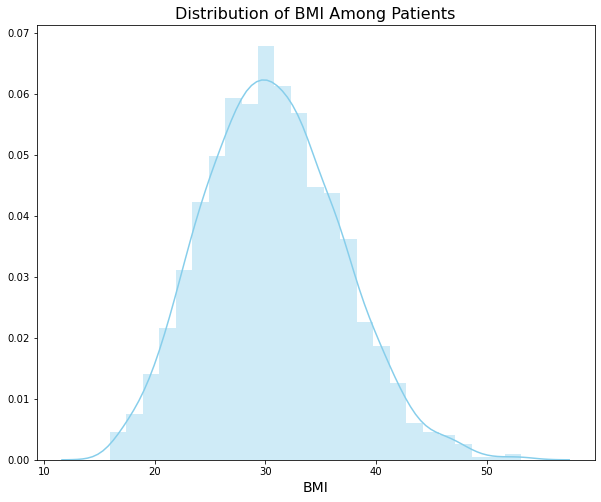

Average of BMI among patients is 30.663.


In [56]:
plt.figure(figsize=(10,8))
plt.title('Distribution of BMI Among Patients', fontsize=16)
sns.distplot(df.bmi, color='skyblue')
ax = plt.gca()
ax.set_xlabel('BMI', fontsize=14)
plt.show()
print(f'Average of BMI among patients is {round(np.mean(df.bmi), 3)}.')

According to the chart below, the BMI average from the data we are observing is the beginning of obesity. We are highly interested in the charges for patients with BMI under 30.6 and above it to see the direct correlation.![BMI](https://i.insider.com/57d291cadd0895c6308b46b0?width=900&format=jpeg&auto=webp)

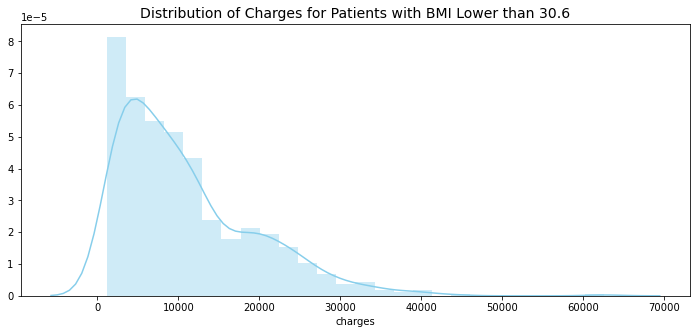

In [59]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Charges for Patients with BMI Lower than 30.6', fontsize=14)
sns.distplot(df[(df.bmi < 30.6)]['charges'], color='skyblue')
plt.show()

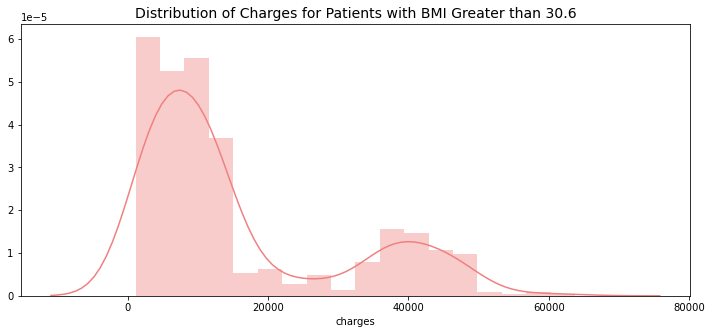

In [60]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Charges for Patients with BMI Greater than 30.6', fontsize=14)
sns.distplot(df[(df.bmi >= 30.6)]['charges'], color='lightcoral')
plt.show()

From those two distribution charts, we can see that patients with BMI greater than the average spends more on treatment.

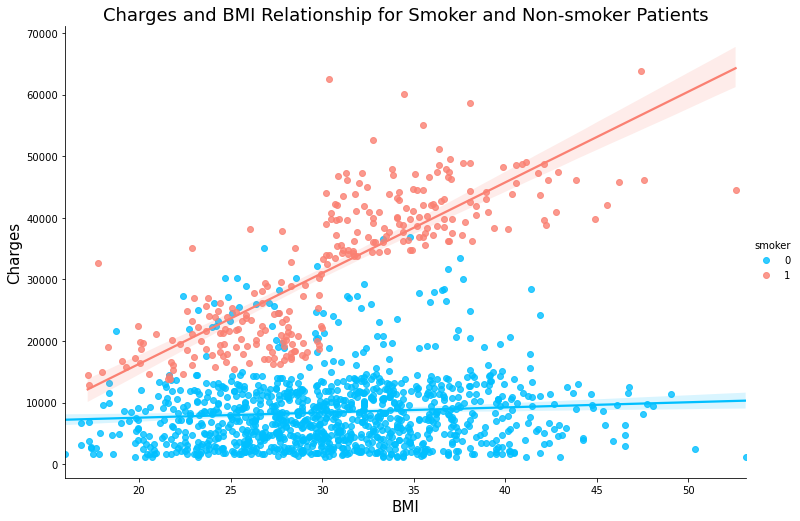

In [26]:
sns.set_palette(sns.color_palette(['deepskyblue', 'salmon']))
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', height=7, aspect=1.5)
ax = plt.gca()
ax.set_title('Charges and BMI Relationship for Smoker and Non-smoker Patients', fontsize=18)
ax.set_xlabel('BMI', fontsize=15)
ax.set_ylabel('Charges', fontsize=15)
plt.show()

Linear regression line on the chart shows that:
1. Charges and BMI of smoker patients are highly proportional, with a steep slope.
2. Charges and BMI of non-smoker patients seems almost unaffected and constant.

As can be seen from the data and charts provided, this means that the model believes if you're a smoker that has a higher BMI you will spend more on medical treatments. We can double check this hypothesis through more calculations using R-squared score as well as more performance evaluation.

### More Data Exploration using Regression

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Linear Regression

In [36]:
x = df.drop(['charges', 'region'], axis = 1) # Removed region since it has the lowest correlation with charges
y = df.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
lr = LinearRegression().fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

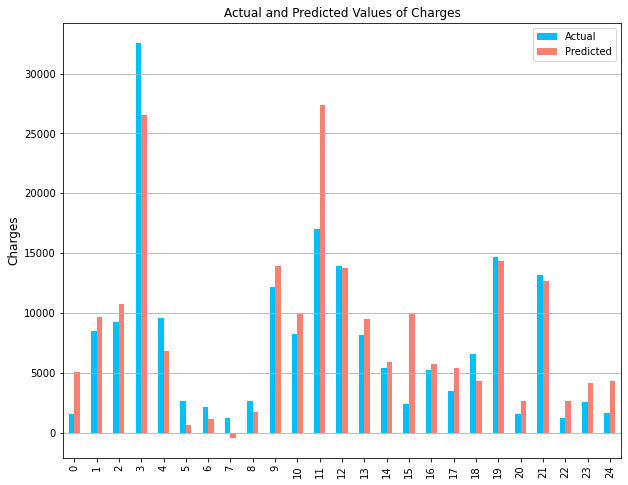

In [37]:
df_lin = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_lin.reset_index(drop=True, inplace=True)
df_lin_random = df_lin.head(25)
ax = df_lin_random.plot(kind='bar', figsize=(10,8), title='Actual and Predicted Values of Charges')
ax.set_ylabel('Charges', fontsize=12)
plt.grid(axis='y')
plt.show()

The actual and predicted charges values derived using the linear model is not very precise, however, the predicted percentages are close to the actual value.

#### Polynomial Linear Regression

In [39]:
X = df.drop(['charges','region'], axis = 1) # Removed region since it has the lowest correlation with charges
Y = df.charges

poly = PolynomialFeatures(degree = 2)
x_quad = poly.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state = 0)

plr = LinearRegression().fit(X_train, Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

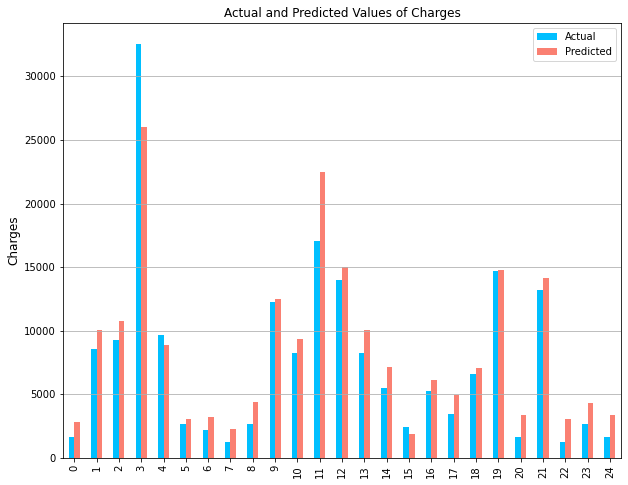

In [40]:
df_poly = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
df_poly.reset_index(drop=True, inplace=True)
df_poly_random = df_poly.head(25)
ax = df_poly_random.plot(kind='bar', figsize=(10,8), title='Actual and Predicted Values of Charges')
ax.set_ylabel('Charges', fontsize=12)
plt.grid(axis='y')
plt.show()

Compared to the previous model, this model has returned a better prediction results. To compare directly how both model performs, we will be conducting performance evaluation of the error numbers.

#### Performance evaluation

In [181]:
print('Linear regression model scores')
print('R-Squared:', lr.score(x_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('\nPolynomial regression model scores')
print('R-Squared:', plr.score(X_test,Y_test))
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

Linear regression model scores
R-Squared: 0.7437441203005137
Mean Absolute Error: 4365.208327621297
Root Mean Squared Error: 6393.835944108861

Polynomial regression model scores
R-Squared: 0.837909800136384
Mean Absolute Error: 3048.6953070449754
Root Mean Squared Error: 5085.140399418258


### Conclusion

The linear regression model provided us with an acceptable R-squared score which mean it is good enough to predict values even with such simple implementation. Although, after another test using a polynomial regression it shows that the R-squared value is higher. This makes us believe that the polynomial model is a better model to predict the charges. However, this is not enough to conclude that one model is better than the other since there is still a possibiility of overfitting. We must observe the other scores to see how it fully performs.

The MAE and RMSE score tells us how big the errors and unexplained variance are expected from the model. It shows that polynomial regression model's MAE and RMSE is lower than the linear regression model. This furthermore support the conclusion that the polynomial regression model is a better model to use to predict medical cost per patient.

#### Predicting cost given new features to model
With the trained polynomial regression model acquired from the previous segment, we can now use it to predict new patients' possible medical cost.

In [184]:
new_patients_name = ['Cody', 'Alice', 'Bob', 'Lydia', 'Dewi']
new_patients = pd.DataFrame({'age':[19, 40, 30, 23, 53],  'sex':[1, 0, 1, 0, 0], 'bmi': [27.9, 50.2, 31.2, 20.4, 28], 'children':[0, 2, 0, 0, 3], 'smoker':[1, 0, 0, 0, 0]})
costs = plr.predict(poly.fit_transform(new_patients))
print("Based on the polynomial regression model, medical cost prediction is as follow:")
for i in range(len(new_patients_name)):
    gender = 'M' if new_patients['sex'][i] == 1 else 'F'
    smoker = 'Y' if new_patients['smoker'][i] == 1 else 'N'
    print('{}. {:5} (Age: {}, Sex: {}, BMI: {}, Children: {}, Smoker: {}) pays ${}'.format(i+1, new_patients_name[i], new_patients['age'][i], gender, new_patients['bmi'][i],new_patients['children'][i], smoker,round(costs[i],2)))

Based on the polynomial regression model, medical cost prediction is as follow:
1. Cody  (Age: 19, Sex: M, BMI: 27.9, Children: 0, Smoker: Y) pays $22540.62
2. Alice (Age: 40, Sex: F, BMI: 50.2, Children: 2, Smoker: N) pays $6637.92
3. Bob   (Age: 30, Sex: M, BMI: 31.2, Children: 0, Smoker: N) pays $4934.82
4. Lydia (Age: 23, Sex: F, BMI: 20.4, Children: 0, Smoker: N) pays $3279.71
5. Dewi  (Age: 53, Sex: F, BMI: 28.0, Children: 3, Smoker: N) pays $13153.71
